# Визуализация траекторий весов по слайсам - Эксперимент 20

Визуализация траекторий весов через слайсы по 30 весов с центрированием по среднему

In [1]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Добавляем путь к проекту
sys.path.append('..')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['font.size'] = 10

## 1. Загрузка данных

In [3]:
# Пути к данным
exp_dir = '../scripts/data/checkpoints/exp20'
learning_rates = [0.001, 0.01, 0.1, 0.5]

# Загружаем параметры для всех lr
all_params = {}
for lr in learning_rates:
    params_path = os.path.join(exp_dir, f'params_lr{lr}.pkl')
    print(f'Загружаем {params_path}...')
    
    if os.path.exists(params_path):
        with open(params_path, 'rb') as f:
            params = pickle.load(f)
        all_params[lr] = params
        print(f'  ✅ lr={lr}: {params.shape} (итераций × параметров)')
    else:
        print(f'  ❌ Файл не найден: {params_path}')

print(f'\nЗагружено {len(all_params)} наборов параметров')

# Определяем размеры для слайсов
if all_params:
    total_params = list(all_params.values())[0].shape[1]
    print(f'Общее количество параметров: {total_params}')

Загружаем ../scripts/data/checkpoints/exp20/params_lr0.001.pkl...
  ✅ lr=0.001: (1020, 386) (итераций × параметров)
Загружаем ../scripts/data/checkpoints/exp20/params_lr0.01.pkl...
  ✅ lr=0.01: (1020, 386) (итераций × параметров)
Загружаем ../scripts/data/checkpoints/exp20/params_lr0.1.pkl...
  ✅ lr=0.1: (1020, 386) (итераций × параметров)
Загружаем ../scripts/data/checkpoints/exp20/params_lr0.5.pkl...
  ✅ lr=0.5: (1020, 386) (итераций × параметров)

Загружено 4 наборов параметров
Общее количество параметров: 386


## 2. Функция визуализации слайсов

In [4]:
def visualize_weight_slice(params_dict, start_idx, end_idx, title_suffix=""):
    """
    Визуализирует слайс весов с центрированием по среднему
    
    Args:
        params_dict: словарь {lr: params_array}
        start_idx: начальный индекс слайса
        end_idx: конечный индекс слайса
        title_suffix: суффикс для заголовка
    """
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown']
    
    plt.figure(figsize=(15, 8))
    
    for i, (lr, params) in enumerate(params_dict.items()):
        # Извлекаем слайс
        p_slice = params[:, start_idx:end_idx]
        
        # Центрируем по среднему
        p_slice_mean = p_slice.mean(axis=0)
        p_correct = p_slice - p_slice_mean
        
        # Визуализируем каждый вес в слайсе
        color = colors[i % len(colors)]
        
        # Рисуем все траектории весов в слайсе
        for j in range(p_correct.shape[1]):
            alpha = 0.8 if j == 0 else 0.3  # Первый вес ярче
            linewidth = 2 if j == 0 else 1
            label = f'lr={lr}' if j == 0 else None
            plt.plot(p_correct[:, j], color=color, alpha=alpha, 
                    linewidth=linewidth, label=label)
    
    plt.title(f'Траектории весов (слайс {start_idx}:{end_idx}) {title_suffix}')
    plt.xlabel('Итерация батча')
    plt.ylabel('Центрированное значение веса')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Статистика слайса
    print(f"\n📊 Статистика слайса {start_idx}:{end_idx}:")
    for lr, params in params_dict.items():
        p_slice = params[:, start_idx:end_idx]
        p_slice_mean = p_slice.mean(axis=0)
        p_correct = p_slice - p_slice_mean
        
        std_mean = np.mean(np.std(p_correct, axis=0))
        range_mean = np.mean(np.max(p_correct, axis=0) - np.min(p_correct, axis=0))
        
        print(f"  lr={lr}: средний std={std_mean:.6f}, средний диапазон={range_mean:.6f}")

## 3. Визуализация разных слайсов весов

📊 Анализируем 6 слайсов по 30 весов:
  Слайс 1: параметры 0:30
  Слайс 2: параметры 71:101
  Слайс 3: параметры 142:172
  Слайс 4: параметры 213:243
  Слайс 5: параметры 284:314
  Слайс 6: параметры 356:386

🔍 Слайс 1: параметры 0:30


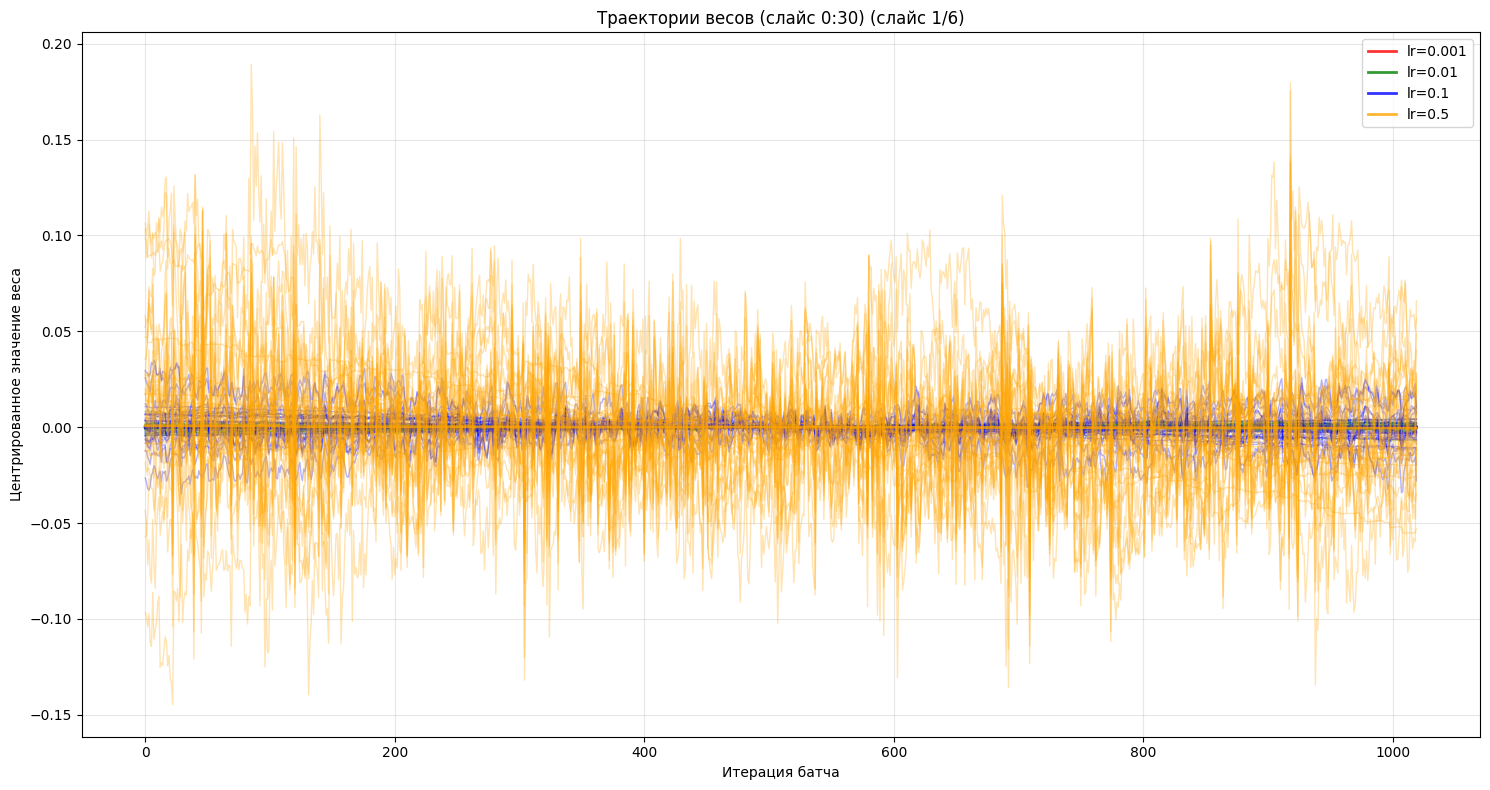


📊 Статистика слайса 0:30:
  lr=0.001: средний std=0.000127, средний диапазон=0.000511
  lr=0.01: средний std=0.000925, средний диапазон=0.003964
  lr=0.1: средний std=0.005159, средний диапазон=0.024407
  lr=0.5: средний std=0.024494, средний диапазон=0.147336

🔍 Слайс 2: параметры 71:101


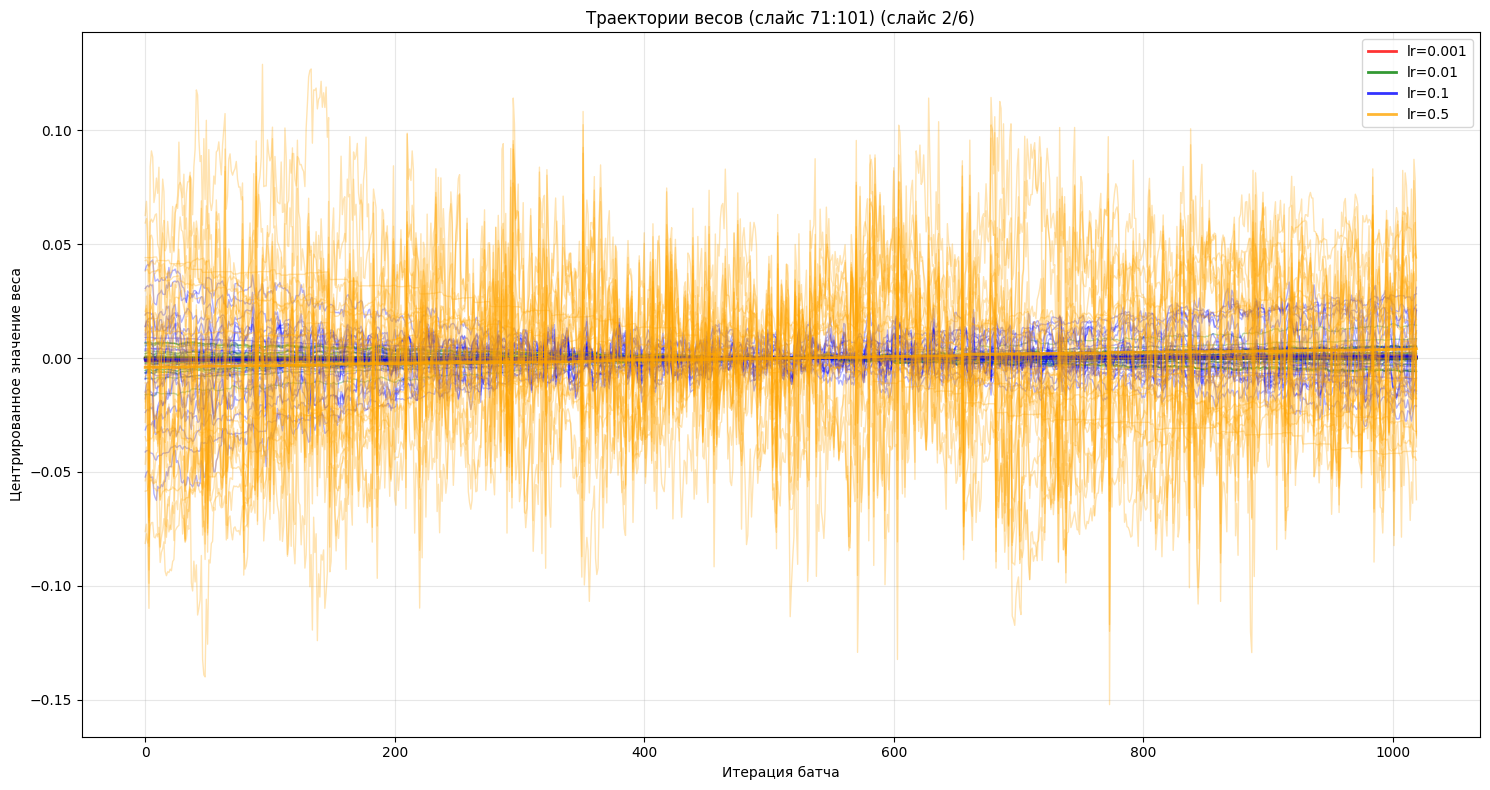


📊 Статистика слайса 71:101:
  lr=0.001: средний std=0.000272, средний диапазон=0.001056
  lr=0.01: средний std=0.001786, средний диапазон=0.006906
  lr=0.1: средний std=0.006513, средний диапазон=0.030333
  lr=0.5: средний std=0.023852, средний диапазон=0.128887

🔍 Слайс 3: параметры 142:172


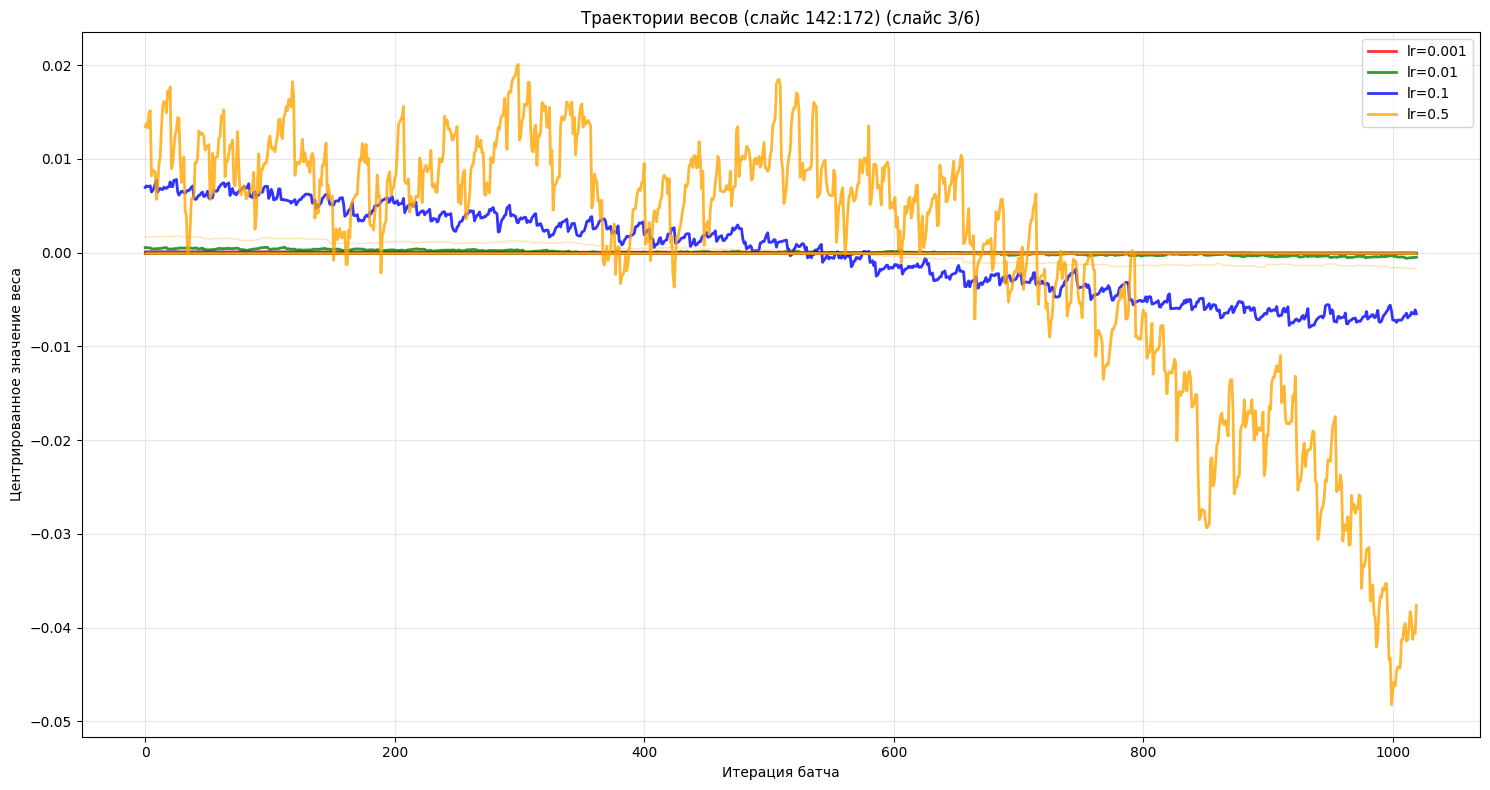


📊 Статистика слайса 142:172:
  lr=0.001: средний std=0.000001, средний диапазон=0.000004
  lr=0.01: средний std=0.000009, средний диапазон=0.000041
  lr=0.1: средний std=0.000155, средний диапазон=0.000539
  lr=0.5: средний std=0.000509, средний диапазон=0.002397

🔍 Слайс 4: параметры 213:243


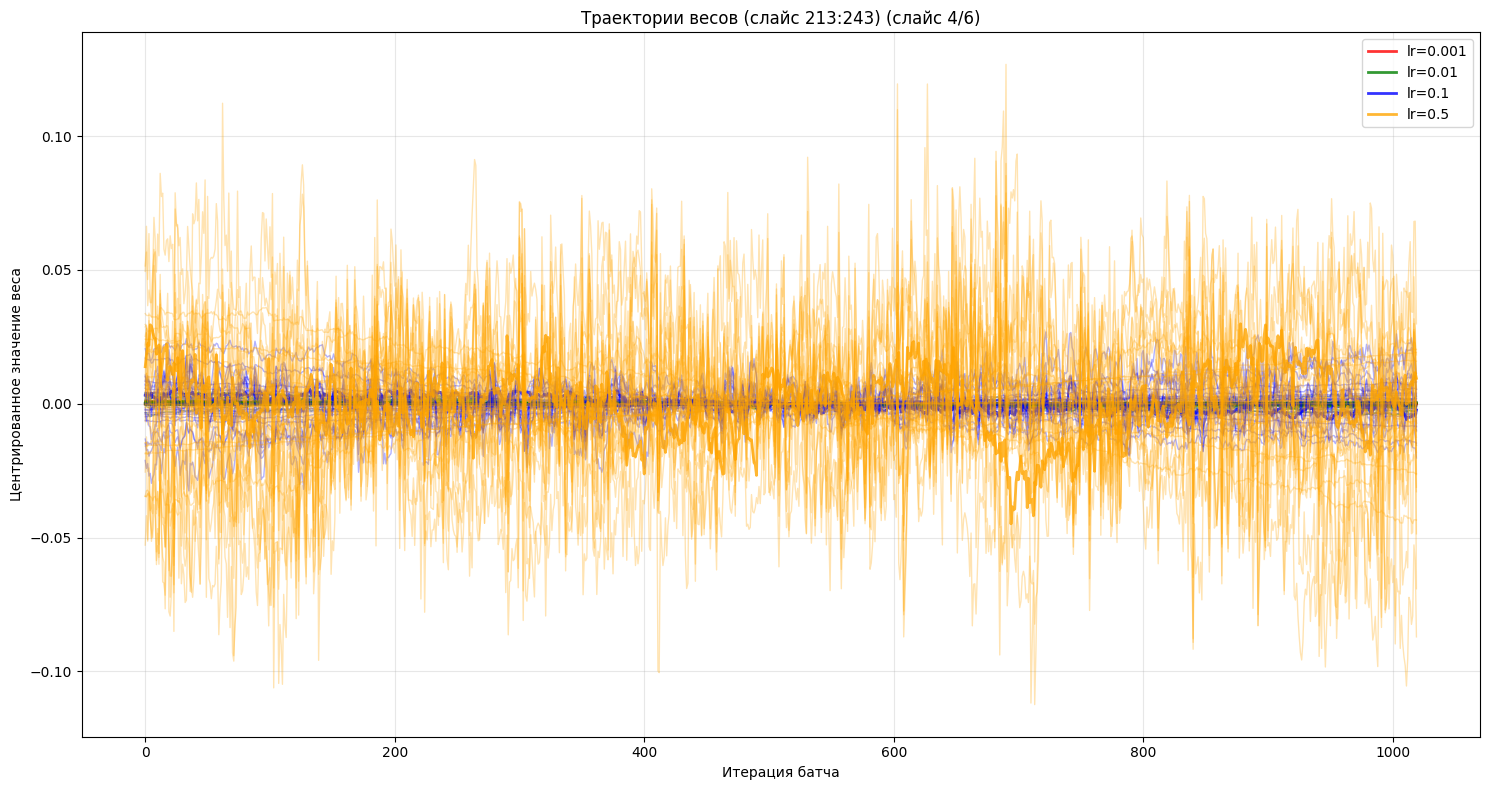


📊 Статистика слайса 213:243:
  lr=0.001: средний std=0.000178, средний диапазон=0.000651
  lr=0.01: средний std=0.000704, средний диапазон=0.003047
  lr=0.1: средний std=0.004411, средний диапазон=0.020862
  lr=0.5: средний std=0.017737, средний диапазон=0.099263

🔍 Слайс 5: параметры 284:314


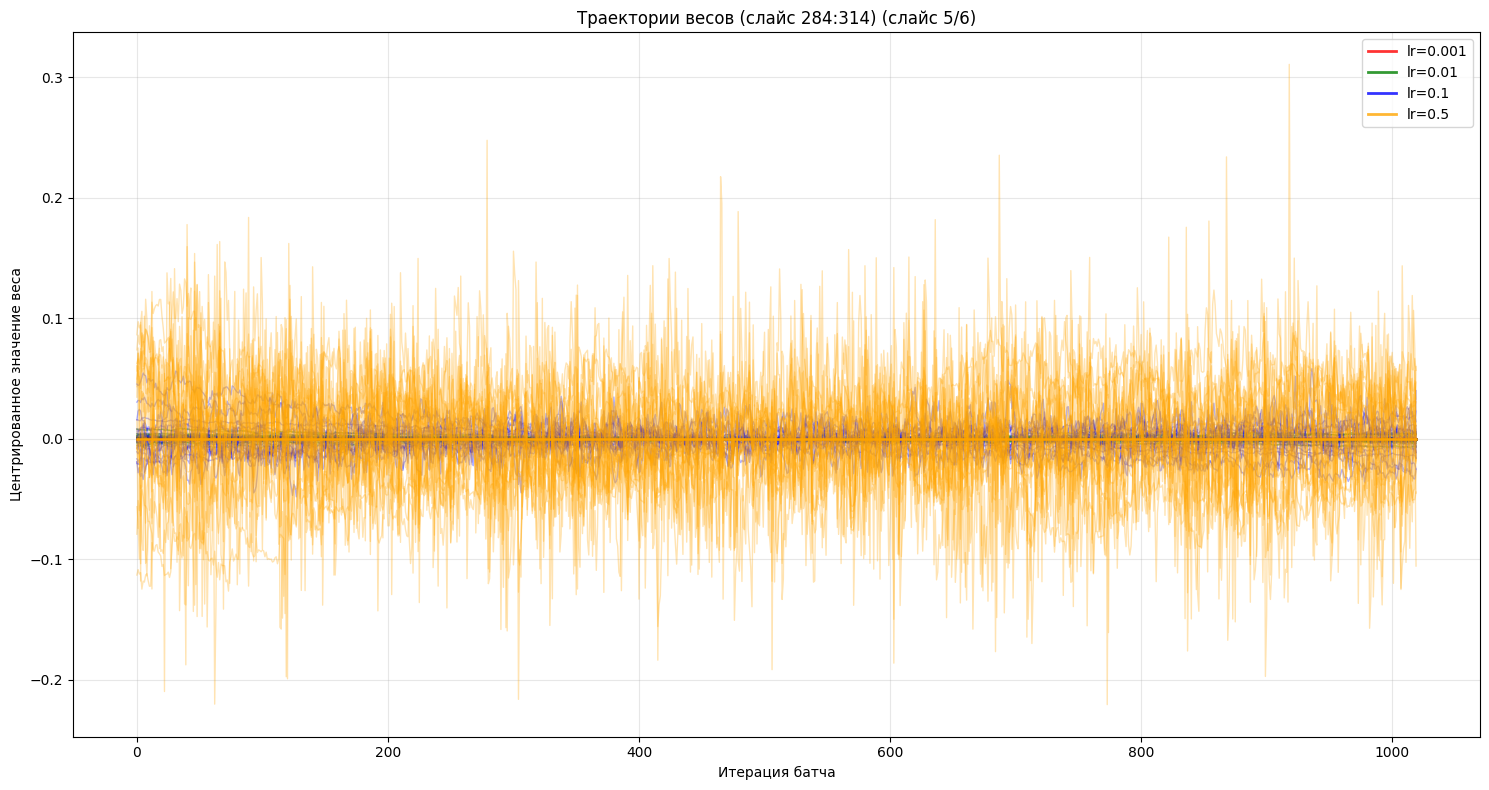


📊 Статистика слайса 284:314:
  lr=0.001: средний std=0.000234, средний диапазон=0.000946
  lr=0.01: средний std=0.001260, средний диапазон=0.005696
  lr=0.1: средний std=0.006147, средний диапазон=0.033091
  lr=0.5: средний std=0.025428, средний диапазон=0.162374

🔍 Слайс 6: параметры 356:386


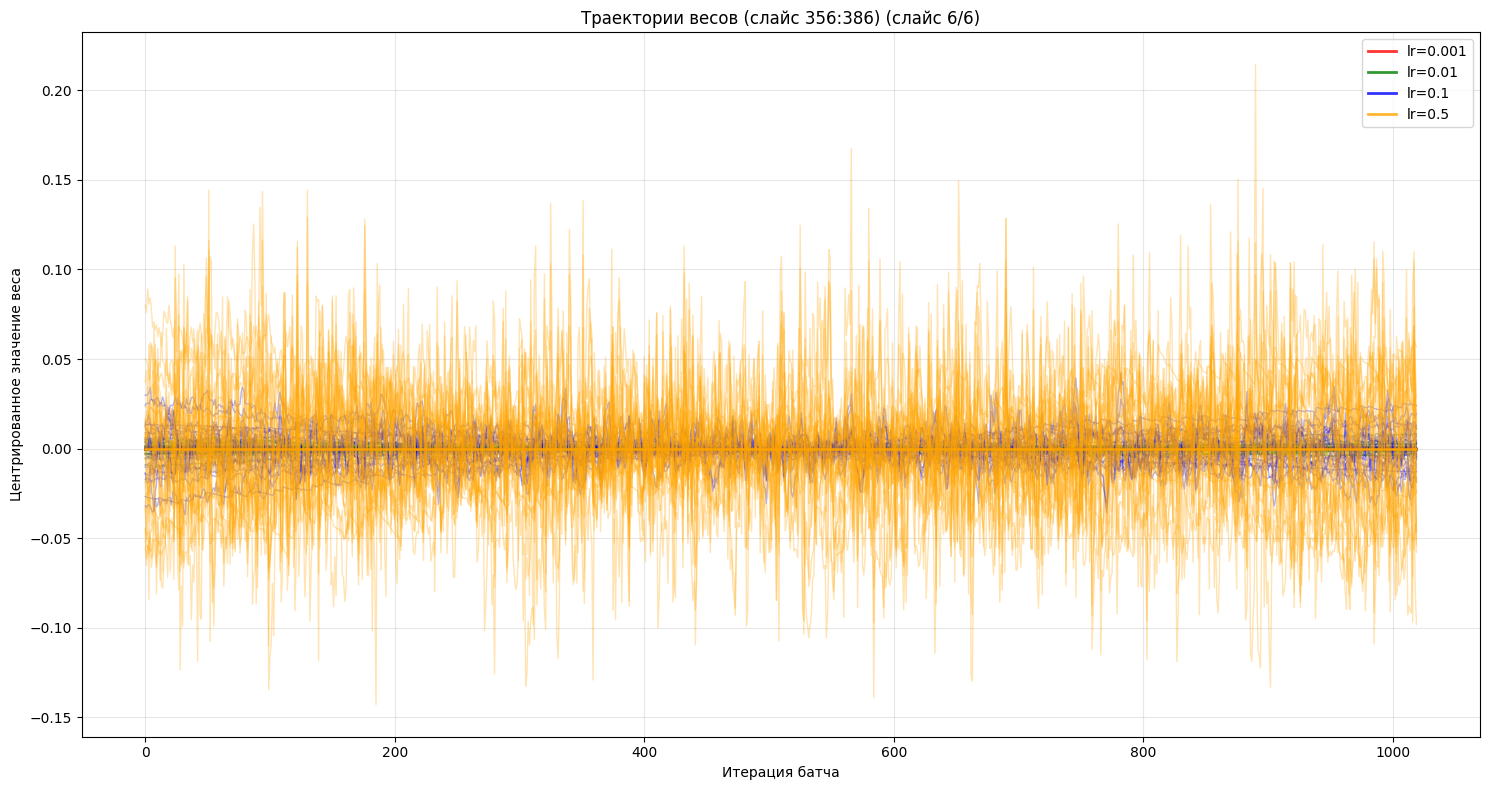


📊 Статистика слайса 356:386:
  lr=0.001: средний std=0.000184, средний диапазон=0.000747
  lr=0.01: средний std=0.001204, средний диапазон=0.005391
  lr=0.1: средний std=0.006274, средний диапазон=0.032017
  lr=0.5: средний std=0.021562, средний диапазон=0.127821


In [5]:
# Определяем интересные слайсы для анализа
slice_size = 30
total_params = list(all_params.values())[0].shape[1]

# Создаем несколько слайсов по всему диапазону параметров
n_slices = min(6, total_params // slice_size)
slice_starts = np.linspace(0, total_params - slice_size, n_slices).astype(int)

print(f"📊 Анализируем {n_slices} слайсов по {slice_size} весов:")
for i, start in enumerate(slice_starts):
    end = start + slice_size
    print(f"  Слайс {i+1}: параметры {start}:{end}")

# Визуализируем каждый слайс
for i, start in enumerate(slice_starts):
    end = start + slice_size
    print(f"\n🔍 Слайс {i+1}: параметры {start}:{end}")
    visualize_weight_slice(all_params, start, end, f"(слайс {i+1}/{n_slices})")

## 4. Специальные слайсы для детального анализа

🎯 Специальные слайсы для детального анализа:

🔍 Первые 30 параметров (0:30):


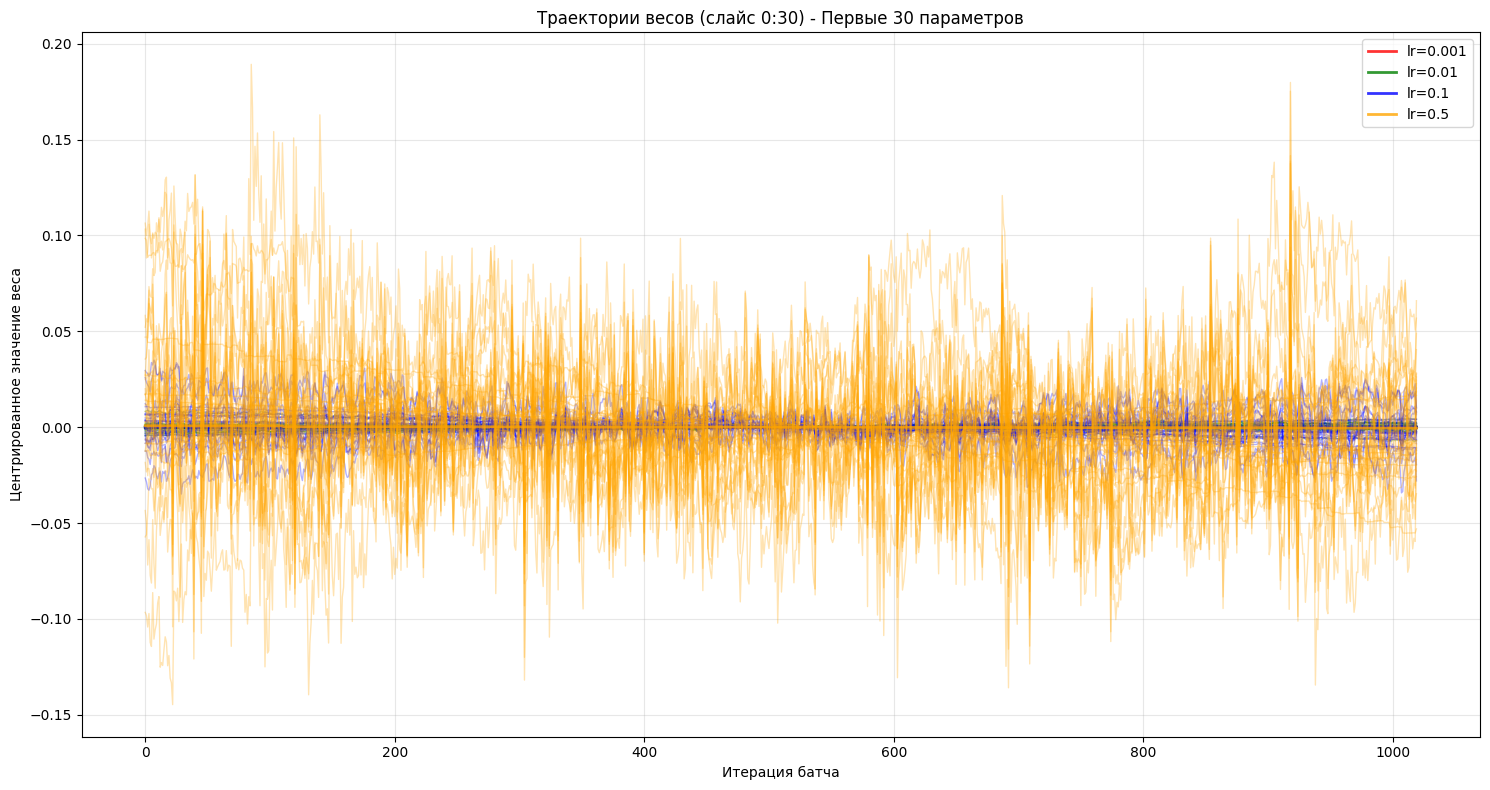


📊 Статистика слайса 0:30:
  lr=0.001: средний std=0.000127, средний диапазон=0.000511
  lr=0.01: средний std=0.000925, средний диапазон=0.003964
  lr=0.1: средний std=0.005159, средний диапазон=0.024407
  lr=0.5: средний std=0.024494, средний диапазон=0.147336

🔍 Средние параметры (169:181) (169:181):


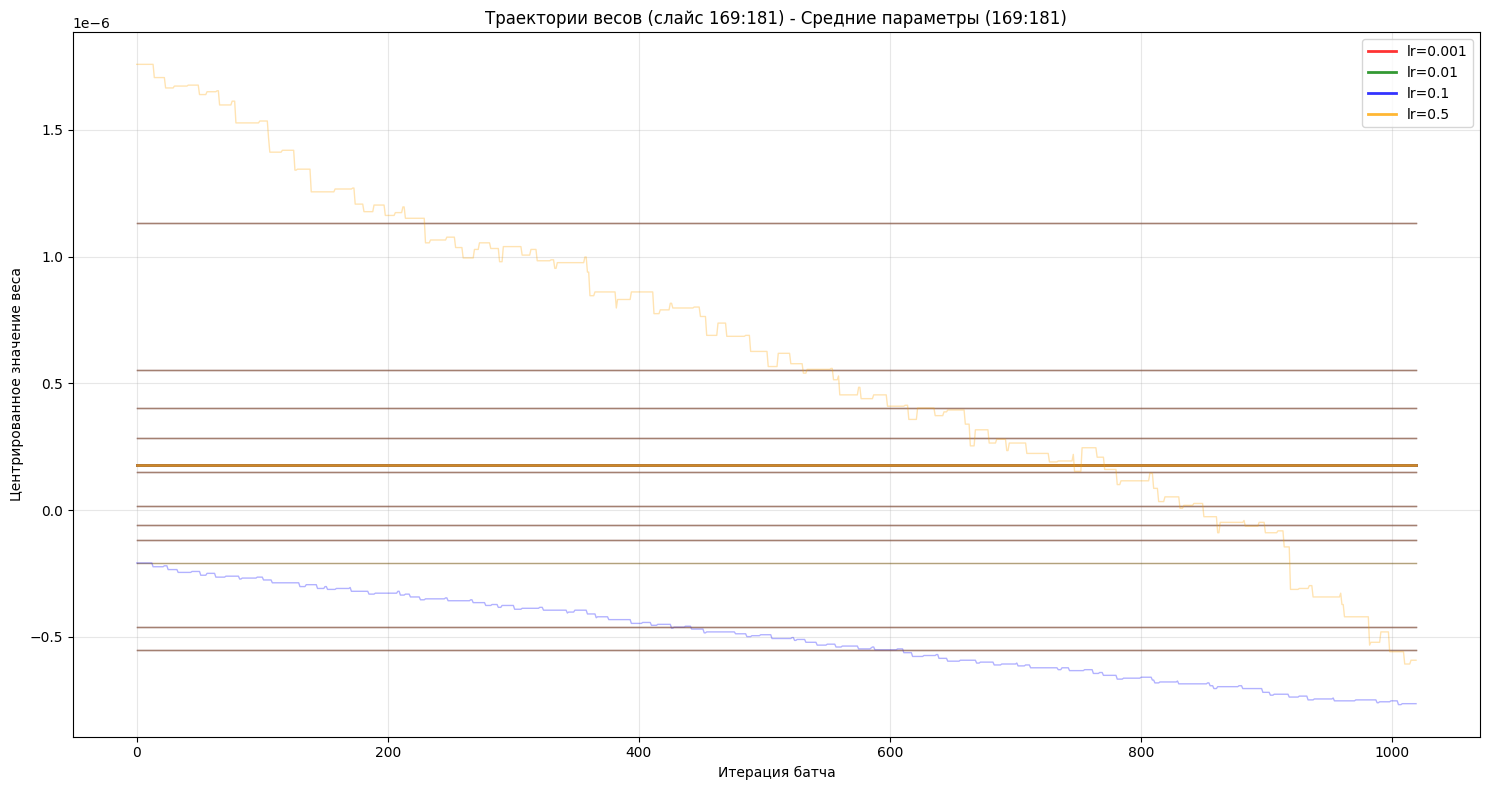


📊 Статистика слайса 169:181:
  lr=0.001: средний std=0.000000, средний диапазон=0.000000
  lr=0.01: средний std=0.000000, средний диапазон=0.000000
  lr=0.1: средний std=0.000000, средний диапазон=0.000000
  lr=0.5: средний std=0.000000, средний диапазон=0.000000

🔍 Последние 30 параметров (356:386):


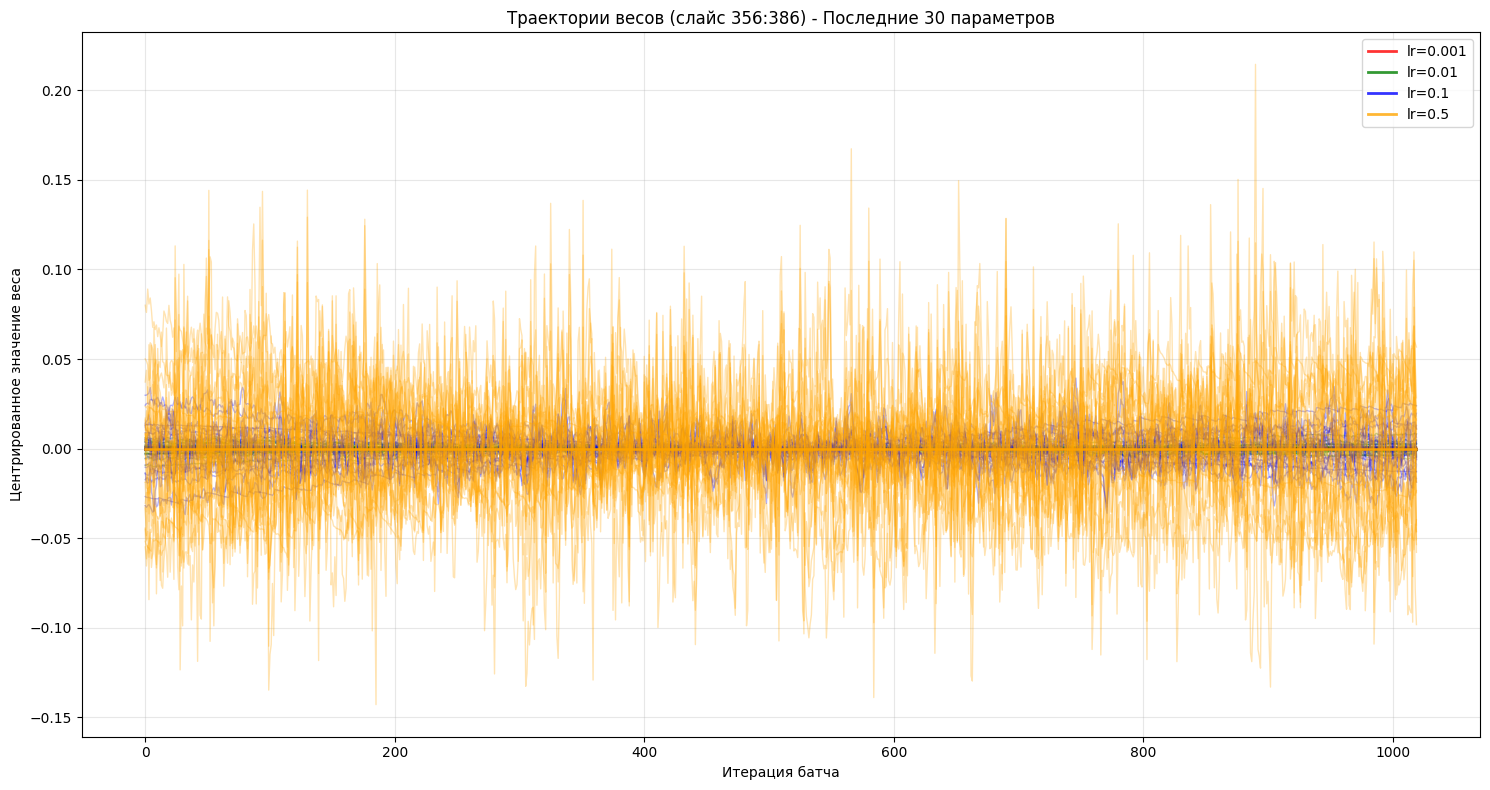


📊 Статистика слайса 356:386:
  lr=0.001: средний std=0.000184, средний диапазон=0.000747
  lr=0.01: средний std=0.001204, средний диапазон=0.005391
  lr=0.1: средний std=0.006274, средний диапазон=0.032017
  lr=0.5: средний std=0.021562, средний диапазон=0.127821


In [6]:
# Анализируем конкретные интересные диапазоны
special_slices = [
    (0, 30, "Первые 30 параметров"),
    (169, 181, "Средние параметры (169:181)"),  # Как в примере
    (total_params-30, total_params, "Последние 30 параметров")
]

print("🎯 Специальные слайсы для детального анализа:")

for start, end, description in special_slices:
    if end <= total_params:  # Проверяем что слайс в пределах
        print(f"\n🔍 {description} ({start}:{end}):")
        visualize_weight_slice(all_params, start, end, f"- {description}")
    else:
        print(f"⚠️ Пропускаем {description} - выходит за пределы ({total_params} параметров)")

## 5. Сравнительный анализ слайсов

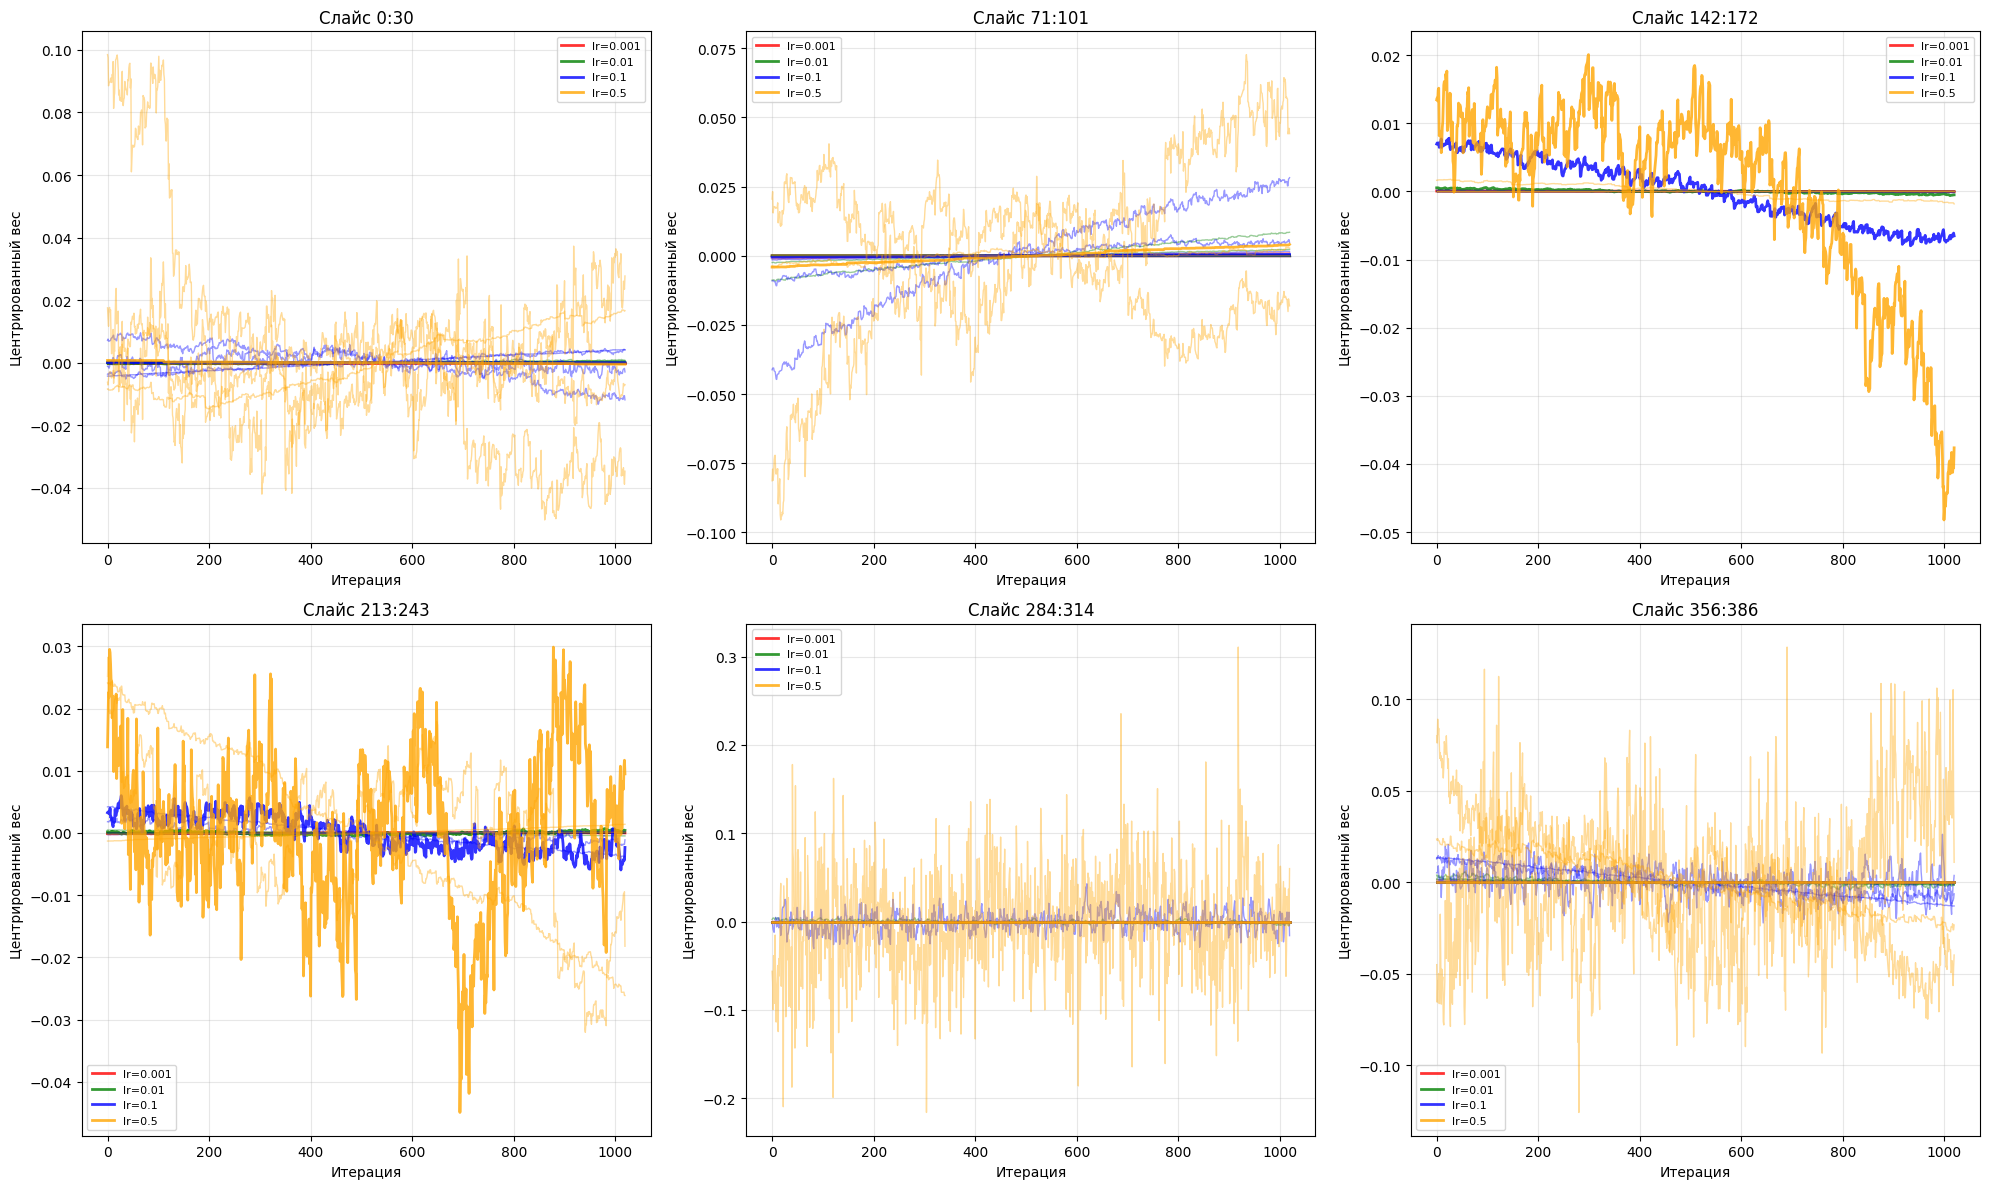

✅ Сохранено сравнение слайсов: weight_slices_comparison.png


In [7]:
# Создаем сравнительную визуализацию нескольких слайсов
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

colors = ['red', 'green', 'blue', 'orange']

# Анализируем первые 6 слайсов
for idx, start in enumerate(slice_starts[:6]):
    end = start + slice_size
    ax = axes[idx]
    
    for i, (lr, params) in enumerate(all_params.items()):
        # Извлекаем и центрируем слайс
        p_slice = params[:, start:end]
        p_slice_mean = p_slice.mean(axis=0)
        p_correct = p_slice - p_slice_mean
        
        color = colors[i % len(colors)]
        
        # Рисуем только первые 5 весов для читаемости
        for j in range(min(5, p_correct.shape[1])):
            alpha = 0.8 if j == 0 else 0.4
            linewidth = 2 if j == 0 else 1
            label = f'lr={lr}' if j == 0 else None
            ax.plot(p_correct[:, j], color=color, alpha=alpha, 
                   linewidth=linewidth, label=label)
    
    ax.set_title(f'Слайс {start}:{end}')
    ax.set_xlabel('Итерация')
    ax.set_ylabel('Центрированный вес')
    ax.legend(fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('weight_slices_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("✅ Сохранено сравнение слайсов: weight_slices_comparison.png")

## 6. Статистический анализ по слайсам

📊 СТАТИСТИКА ПО СЛАЙСАМ:
    slice_idx slice_range     lr  mean_std  mean_range   max_abs
0           0        0:30  0.001  0.000127    0.000511  0.001060
1           0        0:30  0.010  0.000925    0.003964  0.008778
2           0        0:30  0.100  0.005159    0.024407  0.034964
3           0        0:30  0.500  0.024494    0.147336  0.189266
4           1      71:101  0.001  0.000272    0.001056  0.002888
5           1      71:101  0.010  0.001786    0.006906  0.016572
6           1      71:101  0.100  0.006513    0.030333  0.062456
7           1      71:101  0.500  0.023852    0.128887  0.152085
8           2     142:172  0.001  0.000001    0.000004  0.000076
9           2     142:172  0.010  0.000009    0.000041  0.000616
10          2     142:172  0.100  0.000155    0.000539  0.007976
11          2     142:172  0.500  0.000509    0.002397  0.048213
12          3     213:243  0.001  0.000178    0.000651  0.001375
13          3     213:243  0.010  0.000704    0.003047  0.004952


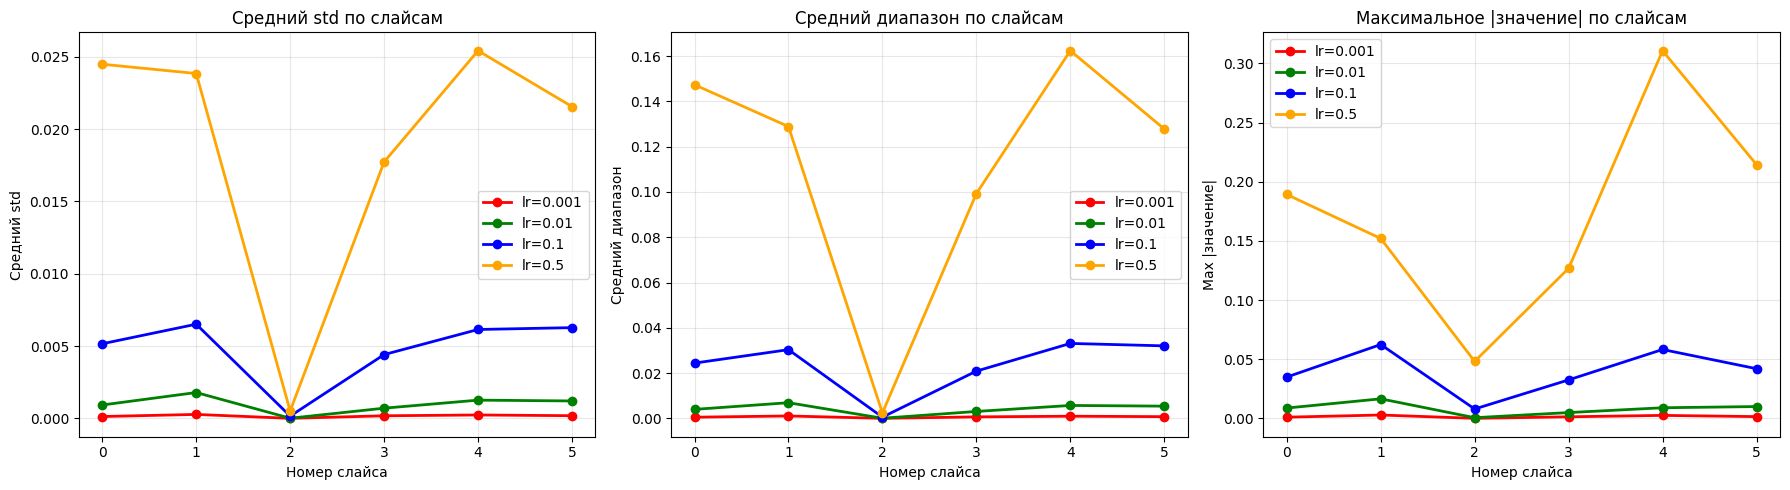


✅ Сохранена статистика слайсов: slice_statistics.png
✅ Статистика сохранена в: slice_statistics.csv


In [8]:
# Анализируем статистики для всех слайсов
slice_stats = []

for i, start in enumerate(slice_starts):
    end = start + slice_size
    
    for lr, params in all_params.items():
        # Извлекаем и центрируем слайс
        p_slice = params[:, start:end]
        p_slice_mean = p_slice.mean(axis=0)
        p_correct = p_slice - p_slice_mean
        
        # Вычисляем статистики
        mean_std = np.mean(np.std(p_correct, axis=0))
        mean_range = np.mean(np.max(p_correct, axis=0) - np.min(p_correct, axis=0))
        max_abs = np.max(np.abs(p_correct))
        
        slice_stats.append({
            'slice_idx': i,
            'slice_range': f'{start}:{end}',
            'lr': lr,
            'mean_std': mean_std,
            'mean_range': mean_range,
            'max_abs': max_abs
        })

# Создаем DataFrame
df_stats = pd.DataFrame(slice_stats)

print("📊 СТАТИСТИКА ПО СЛАЙСАМ:")
print("=" * 80)
print(df_stats.round(6))

# Визуализация статистик
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (lr, color) in enumerate(zip(learning_rates, colors)):
    lr_data = df_stats[df_stats['lr'] == lr]
    
    # График 1: Средний std
    axes[0].plot(lr_data['slice_idx'], lr_data['mean_std'], 
                'o-', color=color, label=f'lr={lr}', linewidth=2, markersize=6)
    
    # График 2: Средний диапазон
    axes[1].plot(lr_data['slice_idx'], lr_data['mean_range'], 
                'o-', color=color, label=f'lr={lr}', linewidth=2, markersize=6)
    
    # График 3: Максимальное абсолютное значение
    axes[2].plot(lr_data['slice_idx'], lr_data['max_abs'], 
                'o-', color=color, label=f'lr={lr}', linewidth=2, markersize=6)

axes[0].set_title('Средний std по слайсам')
axes[0].set_xlabel('Номер слайса')
axes[0].set_ylabel('Средний std')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].set_title('Средний диапазон по слайсам')
axes[1].set_xlabel('Номер слайса')
axes[1].set_ylabel('Средний диапазон')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].set_title('Максимальное |значение| по слайсам')
axes[2].set_xlabel('Номер слайса')
axes[2].set_ylabel('Max |значение|')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('slice_statistics.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Сохранена статистика слайсов: slice_statistics.png")

# Сохраняем статистику в CSV
df_stats.to_csv('slice_statistics.csv', index=False)
print("✅ Статистика сохранена в: slice_statistics.csv")

## 7. Выводы

Анализ траекторий весов по слайсам показывает:

1. **Центрирование по среднему** позволяет лучше видеть относительные изменения весов
2. **Разные слайсы** могут показывать различные паттерны поведения
3. **Learning rate** влияет на амплитуду и характер изменений в каждом слайсе
4. **Статистический анализ** помогает количественно сравнить поведение разных частей модели